<a href="https://colab.research.google.com/github/fouziasharkar/DS-Project/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

## Overall Dataset Preprocessing


*  drop remark col
*   set index to sl no
*   rename col
*   convert amount to cr Rs
*   date column
*   dropna





In [ ]:
rd = pd.read_csv('startup_funding.csv')

In [ ]:
rd.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


In [ ]:
#remark col drop
rd.drop(columns = 'Remarks',inplace=True)

In [ ]:
#set index as sr no
rd.set_index('Sr No',inplace = True)

In [ ]:
#rename column

rd.rename(columns = {

    'Date dd/mm/yyyy': 'date',
    'Startup Name' : 'startup',
    'Industry Vertical' : 'vertical',
    'SubVertical': 'subvertical',
    'City  Location': 'city',
    'Investors Name' : 'investors',
    'InvestmentnType' : 'round',
    'Amount in USD' : 'amount'


},inplace=True)
rd.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"


In [ ]:
#convert amount to cr Rs

In [ ]:
rd['amount']= rd['amount'].fillna('0')
rd['amount']= rd['amount'].str.replace(',','')
rd['amount']= rd['amount'].str.replace('undisclosed','0')
rd['amount']= rd['amount'].str.replace('unknown','0')
rd['amount']= rd['amount'].str.replace('Undisclosed','0')

rd = rd[rd['amount'].str.isdigit()]
rd['amount'] = rd['amount'].astype('float')

<ipython-input-8-3501a0c33b48>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd['amount'] = rd['amount'].astype('float')


In [ ]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subvertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3005 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [ ]:
def to_inr(dollar):
  inr = dollar*82.5
  return inr/10000000


rd['amount']=rd['amount'].apply(to_inr)

<ipython-input-10-6db5c33d2a1a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd['amount']=rd['amount'].apply(to_inr)


In [ ]:
#date column

rd['date']= pd.to_datetime(rd['date'], errors='coerce')
rd['date']

<ipython-input-11-ce50bbcf2561>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd['date']= pd.to_datetime(rd['date'], errors='coerce')


Sr No
1      2020-09-01
2             NaT
3      2020-09-01
4      2020-02-01
5      2020-02-01
          ...    
3040          NaT
3041          NaT
3042          NaT
3043          NaT
3044          NaT
Name: date, Length: 3029, dtype: datetime64[ns]

In [ ]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1283 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3005 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [ ]:
rd.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [ ]:
#dropna

rd = rd.dropna(subset = ['date','startup','vertical','city','investors','round','amount'])

In [ ]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1202 entries, 1 to 2829
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1202 non-null   datetime64[ns]
 1   startup      1202 non-null   object        
 2   vertical     1202 non-null   object        
 3   subvertical  890 non-null    object        
 4   city         1202 non-null   object        
 5   investors    1202 non-null   object        
 6   round        1202 non-null   object        
 7   amount       1202 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 84.5+ KB


In [ ]:
#data export

rd.to_csv('startup-cleaned-data.csv',index=False)

##Overall Data Analysis

1. MoM chart -> Total + Count
2. Cards -> Total + Max + Avg -> Total funded startups
3. Sector Analysis Pie -> top sectors(Count + Sum)
4. Type of funding
5. City wise funding
6. Top Startups -> year wise -> Overall
7. Top investors
8. Funding Heatmap




###cards

In [ ]:
#cards
#Total money invested on startups
round(rd['amount'].sum())


122799

In [ ]:
#avg
rd.groupby('startup')['amount'].sum().mean()

113.59781733510637

In [ ]:
#total funded startup
rd.groupby('startup')['startup'].count().sum()

1202

In [ ]:
rd['startup'].nunique()

1081

###MOM chart -> total/count

In [ ]:
rd['month']=rd['date'].dt.month

In [ ]:
rd.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount,month
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,9
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,9


In [ ]:
#total
temp_rd = rd.groupby(['year','month'])['amount'].sum().reset_index()
temp_rd['month-year'] = rd['month'].astype(str) + '-' + rd['year'].astype(str)
temp_rd

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,year,month,amount,month-year
0,2015,1,5274.637500,NaN
1,2015,2,1567.178250,9-2020
2,2015,3,1910.658750,NaN
3,2015,4,1936.646250,9-2020
4,2015,5,817.863750,2-2020
...,...,...,...,...
57,2019,11,1153.350000,NaN
58,2019,12,1233.375000,NaN
59,2020,2,39.600000,NaN
60,2020,9,1801.460595,NaN


In [ ]:
#count
star_count = rd.groupby(['year','month'])['startup'].count().reset_index()
star_count['year-month'] = rd['year'].astype(str) + '-' + rd['month'].astype(str)
star_count
y=star_count[['startup','year-month']]
y

,startup,year-month
0,35,NaN
1,14,2020-9
2,36,NaN
3,21,2020-9
4,22,2020-2
...,...,...
57,5,NaN
58,5,NaN
59,2,NaN
60,2,NaN


###Top sector -> count/sum

In [ ]:
rd.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount,month
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,9
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,9


<Axes: ylabel='amount'>

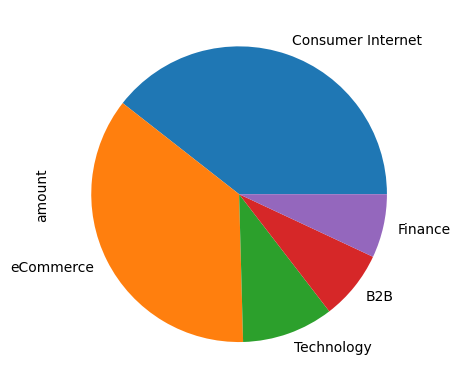

In [ ]:
#sum
rd.groupby('vertical')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie')

###Type of funding

In [ ]:
rd.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,9,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,9,2020


In [ ]:
rd.groupby('round')['amount'].sum()

round
Angel                              1.196250
Angel / Seed Funding               0.660000
Angel Round                        2.636741
Bridge Round                       0.000000
Corporate Round                  314.160000
Debt Funding                     486.742484
Debt and Preference capital       52.146765
Debt-Funding                      41.250000
Equity                             8.250000
Inhouse Funding                   20.158834
Maiden Round                      37.125000
Pre Series A                       0.000000
Pre-Series A                      64.944000
Pre-series A                      24.750000
Private                          129.525000
Private Equity                 92346.512486
Private Equity Round            4174.500000
Private Funding                  121.110000
Seed                             423.225000
Seed / Angel Funding             103.179450
Seed / Angle Funding             825.000000
Seed Funding                    1142.012025
Seed Round                

### Top Startups Year wise


In [ ]:
rd.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount,month
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,9
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,9


In [ ]:
rd.groupby(['year','startup'])['amount'].sum().reset_index().sort_values(['year', 'amount'], ascending=[True, False]).groupby('year').head(1)

KeyError: 'year'

### Top investors


In [ ]:
rd.groupby('investors')['amount'].sum().sort_values(ascending=False).head(5)

investors
Softbank                                                                20625.00
Altimeter Capital, DST Global                                            4826.25
Alibaba, Foxconn, Softbank                                               4125.00
Bennett Coleman and Company Ltd (BCCL)                                   3712.50
DST Global, Steadview Capital, Tiger Global, Accel Partners & Others     3300.00
Name: amount, dtype: float64

##Startup column manupulation

1.Name

2.Founders

3.Industry

4.Subindustry

5.Location

6.Funding Rounds

*   stage
*   Investors
*   Date

7.Similar company


In [ ]:
sorted(rd['startup'].unique())

['"BYJU\\\\\'S"',
 '19th mile',
 '1Crowd',
 '33Coupons',
 '360Ride',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 'A&R Bon Vivants',
 'ABI Health',
 'AYE Finance',
 'AadharAPI.com',
 'Aahaa',
 'Aahaa Stores',
 'Abhibus',
 'Ace Turtle',
 'Ace2three',
 'ActOnMagic',
 'Actionable Analytics',
 'Active.ai',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'Adytude',
 'Aequm',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'Agrostar',
 'Agrowave',
 'Airwood',
 'Alef\\\\nMobitech',
 'AllIzHealth',
 'Allygrow Technologies',
 'Alpha Capital',
 'Alteria Capital',
 'Alternacare',
 'Altizone',
 'American Vision',
 'Ampere',
 'Anakage',
 'Anandakanda',
 'Anchanto',
 'Annapurna Finance',
 'AppBrowzer',
 'AppDaily',
 'AppVirality',
 'Appario Retail Pvt Ltd.',
 'Applicate',
 'Applied Solar Technologies',
 'Applop',
 'AppsDaily',
 'Appvigil',
 'Arcatron',
 'Arcatron Mobility',
 'Arkin Net',
 'Arth DesignBuild',
 'Asia Institute Of Medical S

In [ ]:
rd.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,9,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,9,2020


In [ ]:
#industry
industry = rd[rd['startup'].str.contains('Mamaearth')]['vertical'].values[0]

'E-commerce'

In [ ]:
#sub-industry
industry = rd[rd['startup'].str.contains('Mamaearth')]['subvertical'].values[0]

In [ ]:
#city
rd[rd['startup'].str.contains('BYJU\'S')]['city']


Series([], Name: city, dtype: object)

In [ ]:
#Funding rounds
funding_rounds = rd[rd['startup'].str.contains('Mamaearth')][['round','investors','date']]
funding_rounds.rename(columns={'round': 'stage'})
#rd.groupby(['startup','round','investors','date'])['amount'].sum().sort_values(ascending=False)


,stage,investors,date
Sr No,,,
3,Series B,Sequoia Capital India,2020-09-01


In [ ]:
#similar companies

rd.head(2)


,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,9,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,9,2020


In [ ]:
ver = rd.groupby('vertical')['startup']
for vertical, companies in ver:
    companies.tolist()

target_company = 'Mamaearth'
target_vertical = rd[rd['startup'] == target_company]['vertical'].values[0]

similar_companies = rd[rd['vertical'] == target_vertical]['startup']

similar_companies.reset_index().drop(columns='Sr No',index=0)

,startup
1,StyleDotMe
2,Medlife
3,Kabadiwala
4,Craftsvilla
5,WOTU
6,DAAKI
7,Appario Retail Pvt Ltd.


In [ ]:
for vertical, companies in ver:
    #print(vertical)
    print(companies.tolist())


['WoNoBo']
['FleetX']
['Vyapar App']
['Kulzy']
['Digital F5']
['Dhruva Space']
['Seed Schools']
['Pokkt']
['Shuttl']
['Appvigil']
['Arth DesignBuild']
['Uniphore']
['PosterGully']
['RenewBuy']
['Jugnoo']
['Grey Orange']
['CarDekho', 'Droom']
['Udaan', 'ShopKirana']
['Udaan']
['Bizongo']
['Tracxn']
['Fintellix']
['Nykaa']
['HiJinny']
['BigStylist.com']
['Vyomo']
['iCustomadeit']
['Saama']
['Flytxt', 'Axtria']
['Black White Orange Brands']
['Delight Foods']
['Wudstay']
['Oyorooms']
['Deyor Rooms']
['CityFlo']
['Retigence Technologies']
['Infogain']
['Cloudcherry Analytics']
['Olacabs']
['Coolshare']
['Ola Cabs']
['NDTV ecommerce venture']
['CaRPM']
['Sheroes']
['Ignis Careers']
['Collectabillia']
['JoeHukum']
['LocalCircles']
['Gridle']
['ZapStitch']
['mFicient']
['Capillary Tech']
['RoomCentral']
['YouthKiAwaaz']
['WizCounsel']
['Netmeds', 'Daily hunt', 'HappyGoEasy', 'Nykaa', 'Dream11', 'Pharmeasy', 'Samosa Labs', 'ZiffyHomes', 'ShopX', 'MakeMyTrip', 'Hansel io', 'Metro Bikes', 'Phone 

In [ ]:
target_company = 'Mamaearth'
target_vertical = rd[rd['startup'] == target_company]['vertical'].values[0]
target_vertical

'E-commerce'

In [ ]:
similar_companies = rd[rd['vertical'] == target_vertical]['startup'].reset_index().drop(columns='Sr No')

similar_companies

,startup
0,Mamaearth
1,StyleDotMe
2,Medlife
3,Kabadiwala
4,Craftsvilla
5,WOTU
6,DAAKI
7,Appario Retail Pvt Ltd.


In [ ]:
similar_companies[~similar_companies['startup'].str.contains(target_company)]

,startup
1,StyleDotMe
2,Medlife
3,Kabadiwala
4,Craftsvilla
5,WOTU
6,DAAKI
7,Appario Retail Pvt Ltd.


##Investor column Manupulation

In [ ]:
#data preprocessing
sorted(set(rd['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 91springboard',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhinav Patodia',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Accel India',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners and G Raghunandan',
 ' Accel Partners and IDG Ventures',
 ' Accel Partners and Saama Capital',
 ' Accion',
 ' Adam D\\\\xe2\\\\x80\\\\x99Angelo',
 ' Aditya Agarwal',
 ' Aditya Aggarwal',
 ' Aditya Malik & Others',
 ' Aditya Vazirani',
 ' AdvantEdge Partners',
 ' Adveq Management',
 ' Aijaz Saleem',
 ' Ajay Bhatia',
 ' Ajeet Khurana & others',
 ' Akatsuki and Incubate Fund from Japan and Better Capital AngelList syndicate.',
 ' Alfa Capital',
 ' Alok Divatia',
 ' Alok Mittal',
 ' Alok Sharma',
 ' Aloke Bajp

In [ ]:
#investor details

rd[rd['investors'].str.contains('SoftBank')].head()[['date','startup','vertical','city','round','amount']].reset_index().drop(columns = 'Sr No')



,date,startup,vertical,city,round,amount
0,2017-07-09,OYO Rooms,Consumer Internet,Gurgaon,Private Equity,2062.5
1,2017-01-03,Ola,Consumer Internet,Bangalore,Private Equity,2722.5
2,2015-03-08,Oyorooms,Budget Hotel accommodation brand,New Delhi,Private Equity,825.0


In [ ]:
#Biggest Investment of an investor

rd[rd['investors'].str.contains('SoftBank')].groupby('startup')['amount'].sum().sort_values(ascending = False)

startup
Ola          2722.5
OYO Rooms    2062.5
Oyorooms      825.0
Name: amount, dtype: float64

In [ ]:
rd.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount,month
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,9
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,9


<Axes: ylabel='amount'>

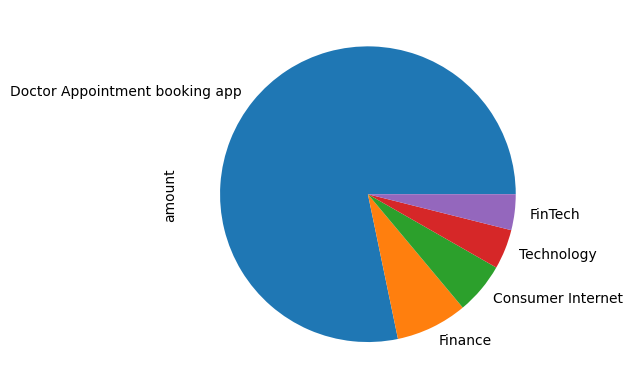

In [ ]:
#generally invests in

rd[rd['investors'].str.contains('Matrix Partner')].groupby('vertical')['amount'].sum().sort_values(ascending=False).plot(kind='pie')

<Axes: ylabel='amount'>

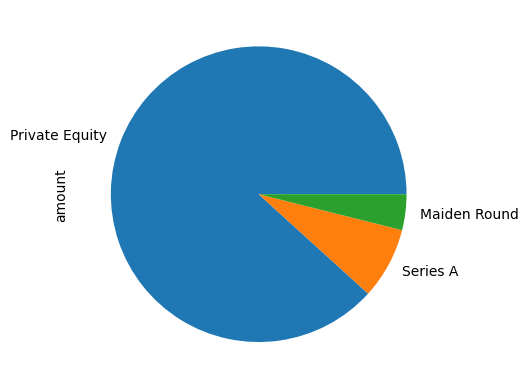

In [ ]:
#round
rd[rd['investors'].str.contains('Matrix Partner')].groupby('round')['amount'].sum().sort_values(ascending=False).plot(kind='pie')

<Axes: ylabel='amount'>

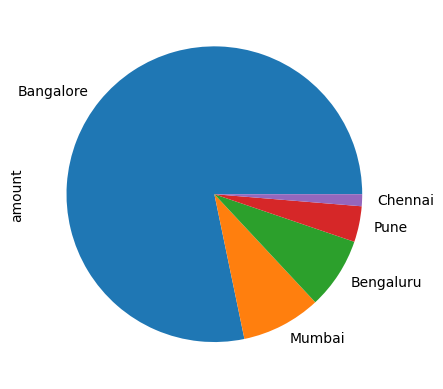

In [ ]:
#city
rd[rd['investors'].str.contains('Matrix Partner')].groupby('city')['amount'].sum().sort_values(ascending=False).plot(kind='pie')

<Axes: xlabel='year'>

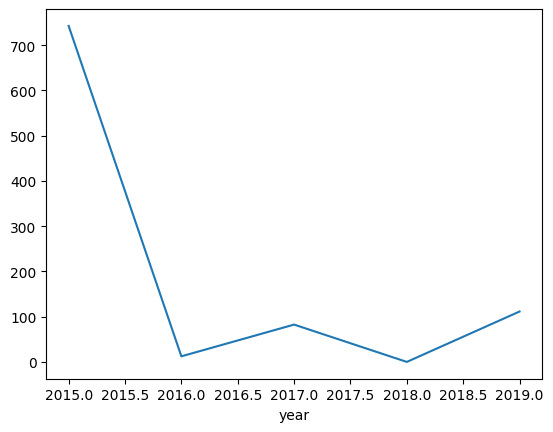

In [ ]:
# Each year investment amount of an investor

rd['year']=rd['date'].dt.year
rd[rd['investors'].str.contains('Matrix Partner')].groupby('year')['amount'].sum().plot()

In [ ]:
rd[rd['investors'].str.contains('Matrix Partner')].groupby('year')['amount'].sum().sort_values(ascending=False)

year
2015    742.500
2019    111.375
2017     82.500
2016     12.375
2018      0.000
Name: amount, dtype: float64